<a href="https://colab.research.google.com/github/akumar054/Bicep/blob/main/Sea_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

This code creates a hidden .kaggle directory in the home folder (~/.kaggle) and copies the kaggle.json file (which contains your Kaggle API credentials) into it for authenticating Kaggle API requests.

In [ ]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste
License(s): other
100% 311M/312M [00:01<00:00, 239MB/s]
100% 312M/312M [00:01<00:00, 223MB/s]


This command downloads the "sea-animals-image-dataset" from Kaggle using the dataset identifier vencerlanz09/sea-animals-image-dataste to the current working directory.

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sea-animals-image-dataste.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

This code opens the zip file located at /content/sea-animals-image-dataste.zip in read mode using Python's zipfile module. It then extracts all the contents of the zip file to the /content directory and closes the zip file after extraction.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import seaborn as sns

In [ ]:
# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import Model

In [ ]:
from pathlib import Path

def walk_through_dir(directory):
    directory = Path(directory)
    for path in directory.glob('**/*'):
        if path.is_dir():
            print(f"Directory: {path}")
        else:
            print(f"File: {path}")

# List of folders to traverse
folders = ["Clams", "Corals", "Crabs", "Dolphin", "Eel", "Fish", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Otter", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Shrimp", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]

# Base path to your dataset
base_path = "/content"

# Traverse through each folder
for folder in folders:
    print(f"Traversing folder: {folder}")
    walk_through_dir(Path(base_path) / folder)
    print("\n" + "-"*40 + "\n")


Streaming output truncated to the last 5000 lines.
File: /content/Seahorse/3050976857_e4d547b6d4_o.jpg
File: /content/Seahorse/Sea Horse (48).jpg
File: /content/Seahorse/4018909442_6ac04a1463_b.jpg
File: /content/Seahorse/Sea Horse (22).jpg
File: /content/Seahorse/9984393_fb8ac77d6a_o.jpg
File: /content/Seahorse/771188303_50cf8d907d_o.jpg
File: /content/Seahorse/6078405180_12283f572f_o.jpg
File: /content/Seahorse/5120704764_1039a3dab2_o.jpg
File: /content/Seahorse/3355925855_58145242be_o.jpg
File: /content/Seahorse/34300109524_e37e56fa09_b.jpg
File: /content/Seahorse/2925971921_2c6188b17f_o.jpg
File: /content/Seahorse/43841226_ae59df5f4f_o.jpg
File: /content/Seahorse/11295965_a0ed0916c7_o.jpg
File: /content/Seahorse/3151030616_640af7d292_o.jpg
File: /content/Seahorse/3496371192_0c4fd40e59_b.jpg
File: /content/Seahorse/2480658499_fb434d5d0e_b.jpg
File: /content/Seahorse/2705852555_3e505edb7e_b.jpg
File: /content/Seahorse/2695121272_9057a7eb08_o.jpg
File: /content/Seahorse/4791097310_709

This code defines a function walk_through_dir that lists all files and directories recursively within a given directory. It then sets up a list of folder names and a base path to the dataset.
This code lists all files and directories for each specified folder within a base directory (/content). It iterates over a predefined list of folder names, printing the folder name and its contents, then separates outputs with a line for clarity.

In [ ]:
from pathlib import Path

def walk_through_dir(directory):
    directory = Path(directory)
    for path in directory.glob('**/*'):
        if path.is_dir():
            print(f"Directory: {path}")
        else:
            print(f"File: {path}")

# List of folders to traverse
folders = ["Clams", "Corals", "Crabs", "Dolphin", "Eel", "Fish", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Otter", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Shrimp", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]

# Base path to your dataset
base_path = "/content"

# Traverse through each folder
for folder in folders:
    print(f"Traversing folder: {folder}")
    walk_through_dir(Path(base_path) / folder)
    print("\n" + "-"*40 + "\n")


Streaming output truncated to the last 5000 lines.
File: /content/Seahorse/3050976857_e4d547b6d4_o.jpg
File: /content/Seahorse/Sea Horse (48).jpg
File: /content/Seahorse/4018909442_6ac04a1463_b.jpg
File: /content/Seahorse/Sea Horse (22).jpg
File: /content/Seahorse/9984393_fb8ac77d6a_o.jpg
File: /content/Seahorse/771188303_50cf8d907d_o.jpg
File: /content/Seahorse/6078405180_12283f572f_o.jpg
File: /content/Seahorse/5120704764_1039a3dab2_o.jpg
File: /content/Seahorse/3355925855_58145242be_o.jpg
File: /content/Seahorse/34300109524_e37e56fa09_b.jpg
File: /content/Seahorse/2925971921_2c6188b17f_o.jpg
File: /content/Seahorse/43841226_ae59df5f4f_o.jpg
File: /content/Seahorse/11295965_a0ed0916c7_o.jpg
File: /content/Seahorse/3151030616_640af7d292_o.jpg
File: /content/Seahorse/3496371192_0c4fd40e59_b.jpg
File: /content/Seahorse/2480658499_fb434d5d0e_b.jpg
File: /content/Seahorse/2705852555_3e505edb7e_b.jpg
File: /content/Seahorse/2695121272_9057a7eb08_o.jpg
File: /content/Seahorse/4791097310_709

This code is used to inspect the structure of a dataset organized into multiple subdirectories. It defines a list of folder names within a base directory (/content) and iterates over each folder, listing all files and directories within each one using the walk_through_dir function. This helps in verifying and understanding the organization of dataset contents for further processing or analysis.

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

# Base path to your dataset
dataset = "/content"

# List of folders to include
folders = ["Clams", "Corals", "Crabs", "Dolphin", "Eel", "Fish", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Otter", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Shrimp", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]

# Loop through each folder
for folder in folders:
    print(f"Checking images in folder: {folder}")
    folder_path = Path(dataset) / folder
    # Search for all .jpg images in the folder and its subfolders
    image_paths = folder_path.rglob("*.jpg")

    for img_p in image_paths:
        try:
            # Try to open the image
            img = PIL.Image.open(img_p)
        except UnidentifiedImageError:
            # If the image cannot be opened, print the path
            print(f"Unidentified image in {folder}: {img_p}")


Checking images in folder: Clams
Checking images in folder: Corals
Checking images in folder: Crabs
Checking images in folder: Dolphin
Checking images in folder: Eel
Checking images in folder: Fish
Checking images in folder: Jelly Fish
Checking images in folder: Lobster
Checking images in folder: Nudibranchs
Checking images in folder: Octopus
Checking images in folder: Otter
Checking images in folder: Penguin
Checking images in folder: Puffers
Checking images in folder: Sea Rays
Checking images in folder: Sea Urchins
Checking images in folder: Seahorse
Checking images in folder: Seal
Checking images in folder: Sharks
Checking images in folder: Shrimp
Checking images in folder: Squid
Checking images in folder: Starfish
Checking images in folder: Turtle_Tortoise
Checking images in folder: Whale


This code is used to verify the integrity of image files in a dataset organized into multiple subdirectories. For each specified folder, it searches for all .jpg images and attempts to open each one using PIL (Python Imaging Library). If an image cannot be opened (likely due to corruption or being in an unsupported format), it prints the path to the problematic image. This helps in identifying and addressing issues with image files in the dataset before further processing or analysis.









<ipython-input-10-479d34a4a011>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='viridis')


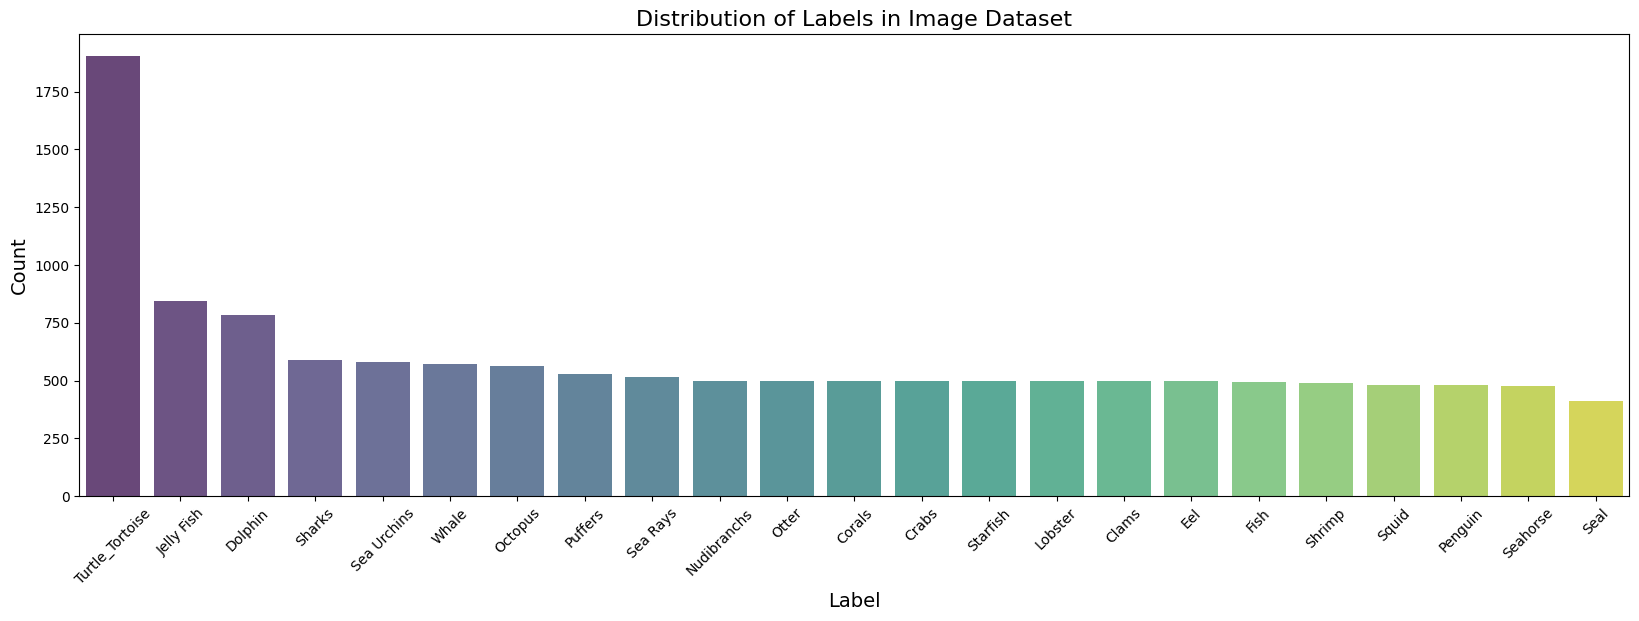

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Base path to your dataset
dataset = "/content"

# List of folders to include
folders = ["Clams", "Corals", "Crabs", "Dolphin", "Eel", "Fish", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Otter", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Shrimp", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]

# Initialize lists to store filepaths and labels
filepaths = []
labels = []

# Loop through each folder to gather filepaths and labels
for folder in folders:
    image_dir = Path(dataset) / folder
    # Get filepaths for images with different extensions
    folder_filepaths = list(image_dir.glob(r'**/*.JPG')) + \
                       list(image_dir.glob(r'**/*.jpg')) + \
                       list(image_dir.glob(r'**/*.png')) + \
                       list(image_dir.glob(r'**/*.PNG'))

    # Extract labels from the folder name
    folder_labels = [folder] * len(folder_filepaths)

    # Extend the main lists
    filepaths.extend(folder_filepaths)
    labels.extend(folder_labels)

# Convert lists to pandas Series
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels into a DataFrame
image_df = pd.concat([filepaths, labels], axis=1)

# Calculate the distribution of labels
label_counts = image_df['Label'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='viridis')
plt.title('Distribution of Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


This code collects image file paths and labels from specified folders and aggregates them into a Pandas DataFrame. It then calculates the distribution of each label (category) and visualizes this distribution using a bar plot. This helps in understanding the balance of categories in the dataset, which is crucial for evaluating and preparing data for model training.

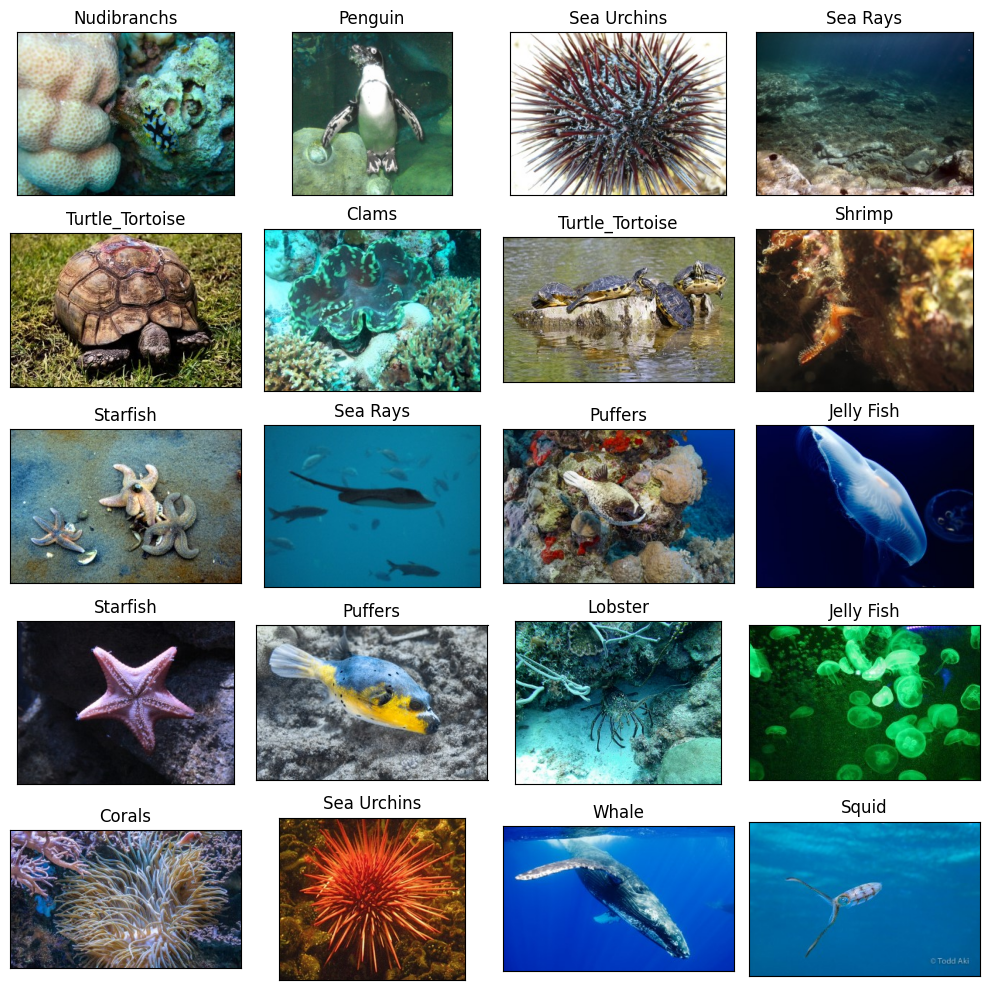

In [ ]:
# Select 20 random images from the dataset
random_index = np.random.randint(0, len(image_df), 20)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

# Display the images with their labels
for i, ax in enumerate(axes.flat):
    img_path = image_df.Filepath.iloc[random_index[i]]
    img_label = image_df.Label.iloc[random_index[i]]

    ax.imshow(plt.imread(img_path))
    ax.set_title(img_label)

plt.tight_layout()
plt.show()


This code randomly selects 20 images from the dataset and displays them in a 5x4 grid. Each image is shown with its corresponding label as a title. This visualization helps in inspecting a sample of the dataset to check the diversity and correctness of the images and their labels.









In [ ]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

This code splits the image_df DataFrame into training and testing sets, with 20% of the data allocated to the test set. The split is performed randomly with shuffling enabled and a fixed random seed (42) to ensure reproducibility. This helps in preparing data for training and evaluating models.

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

This code sets up two ImageDataGenerator instances for image data augmentation and preprocessing.

train_generator: Applies a series of augmentations to training images, including random rotations, shifts, shears, zooms, and flips, while also using EfficientNet's preprocessing function. It also includes a validation split of 20% for internal validation purposes.

test_generator: Only applies the EfficientNet preprocessing function to test images without any augmentation.

These generators prepare and augment images for training and evaluation of machine learning models

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

Found 8775 validated image filenames belonging to 23 classes.
Found 2193 validated image filenames belonging to 23 classes.
Found 2743 validated image filenames belonging to 23 classes.


The code sets up three data generators for training, validation, and testing images:

Training Data: Images and labels are read from train_df. The images are resized, converted to RGB, and loaded in batches of 64. The data is shuffled and split into training and validation subsets.

Validation Data: This is also sourced from train_df, with similar preprocessing as the training data. It’s used to evaluate the model during training to check its performance and help prevent overfitting.

Test Data: Images and labels are read from a separate test_df. The images are preprocessed similarly but are not shuffled, as shuffling is not needed for test data evaluation.

This approach ensures that the model is trained on one set of data, validated on a subset of that data, and finally tested on an entirely separate set of data to assess its performance

In [ ]:
class_labels = list(test_images.class_indices.keys())
print(class_labels)

['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pretrained ResNet101 model without the top layers and with pre-trained ImageNet weights
pretrained_model = tf.keras.applications.ResNet101(include_top=False,
                                                   input_shape=(224, 224, 3),
                                                   weights='imagenet')

# Freeze the pretrained layers to avoid updating weights
for layer in pretrained_model.layers:
    layer.trainable = False

# Build the model using the Functional API
inputs = tf.keras.Input(shape=(224, 224, 3))
x = pretrained_model(inputs, training=False)  # Set training=False to prevent updating BN layers
x = GlobalAveragePooling2D()(x)  # Use GAP to flatten the output
x = Dense(512, activation='relu')(x)
outputs = Dense(23, activation='softmax')(x)

# Create the model
resnet_model = Model(inputs, outputs)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
resnet_model.compile(optimizer=optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Summary of the model
resnet_model.summary()


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet101 (Functional)               │ (None, 7, 7, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 23)                  │          11,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,719,063 (166.77 MB)

 Trainable params: 1,060,887 (4.05 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

This code constructs a model using TensorFlow and Keras with a pre-trained ResNet101 as the base:

Pre-trained ResNet101: The ResNet101 model is loaded without its top layers and with weights pre-trained on ImageNet. These layers are frozen to prevent weight updates during training.

Model Architecture:

Inputs: The model accepts input images of size 224x224x3.
Base Model: The ResNet101 is used to extract features from the input images.
Global Average Pooling: Applies Global Average Pooling (GAP) to flatten the feature maps.
Dense Layers: A fully connected layer with 512 units and ReLU activation is added, followed by a final dense layer with 23 units and softmax activation for classification into 23 classes.
Compilation: The model is compiled with the Adam optimizer (learning rate of 1e-4), categorical crossentropy loss, and accuracy as the evaluation metric.

Summary: The model's architecture and parameters are summarized to review its structure.

In [ ]:
epochs=20

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = resnet_model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[early_stopping],
    verbose=1,batch_size=2048
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.3158 - loss: 2.4868 - val_accuracy: 0.6060 - val_loss: 1.3352
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.6238 - loss: 1.2648 - val_accuracy: 0.6534 - val_loss: 1.1528
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.6756 - loss: 1.0663 - val_accuracy: 0.6721 - val_loss: 1.0759
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.7082 - loss: 0.9652 - val_accuracy: 0.6872 - val_loss: 1.0167
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.7300 - loss: 0.8972 - val_accuracy: 0.6936 - val_loss: 0.9754
Epoch 6/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.7383 - loss: 0.8478 - val_accuracy: 0.7232 - val_loss: 0.9399
Epoch 7/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7550 - loss: 0.8011 - val_accuracy: 0.7200 - val_loss: 0.9321
Epoch 8/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.7656 - loss: 0.7643 - val_accuracy: 0.722

This code trains the ResNet101 model for 20 epochs with early stopping:

Early Stopping: The EarlyStopping callback monitors validation loss, with a patience of 3 epochs to stop training early if no improvement is observed, and restores the model to the best weights.

Training: The model is trained using train_images for 20 epochs, with val_images used for validation. The early_stopping callback is applied to prevent overfitting. The training process uses a batch size of 512 and provides verbose output.

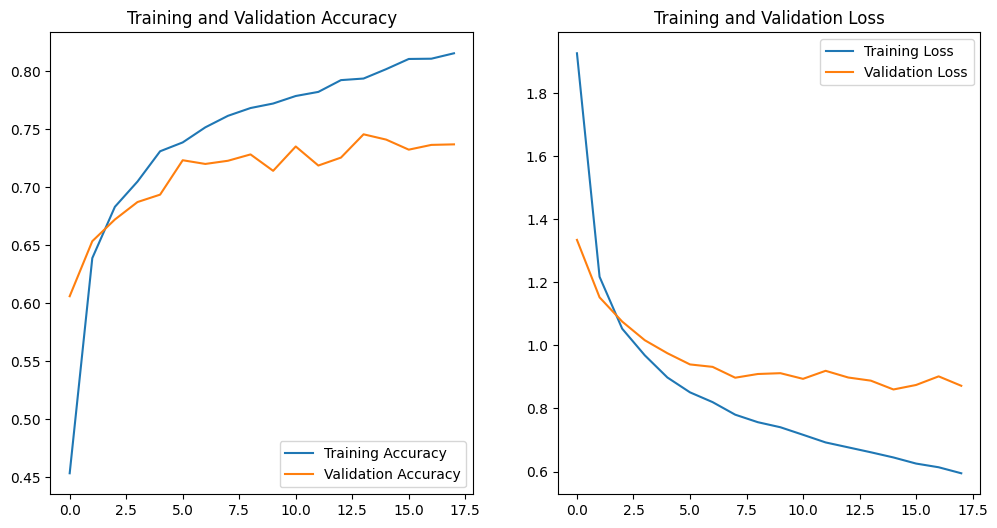

In [ ]:
import matplotlib.pyplot as plt

# Extract the data from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


This code visualizes the model's training progress by plotting accuracy and loss metrics for both the training and validation sets:

Extract Metrics: It retrieves the accuracy and loss values for training and validation from the model's training history.

Create Plots: Two subplots are created:

The first subplot shows the training and validation accuracy over the epochs.
The second subplot displays the training and validation loss over the epochs.
Display Plot: Both plots are displayed side by side to provide a visual comparison of how the model's performance evolves during training. This helps evaluate model learning and detect overfitting.

In [ ]:
import numpy as np
import pandas as pd

# Make predictions on the test dataset
predictions = resnet_model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual class labels from the test data generator
true_classes = test_images.classes

# Get the class labels as a dictionary to map the integer predictions to their string labels
class_labels = list(test_images.class_indices.keys())

# Convert integer predictions to string labels
predicted_labels = [class_labels[i] for i in predicted_classes]

# Create a DataFrame with true labels and predicted labels
results_df = pd.DataFrame({
    'True Label': [class_labels[i] for i in true_classes],
    'Predicted Label': predicted_labels
})

# Display the first few rows of the DataFrame
print(results_df.head())

# Optionally, evaluate the performance on the test data
test_loss, test_accuracy = resnet_model.evaluate(test_images)
print(f'Test Accuracy: {test_accuracy:.4f}')


43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 481ms/step
        True Label  Predicted Label
0         Sea Rays         Sea Rays
1  Turtle_Tortoise  Turtle_Tortoise
2            Whale            Whale
3  Turtle_Tortoise  Turtle_Tortoise
4          Dolphin          Dolphin
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 345ms/step - accuracy: 0.7695 - loss: 0.7786
Test Accuracy: 0.7794


The code makes predictions on a test dataset using the trained ResNet model and converts the predicted probabilities into class labels using np.argmax. It retrieves the true class labels from the test dataset and maps the integer predictions to their respective string labels. A DataFrame is created to display the true labels alongside the predicted labels for comparison. Additionally, the model's performance on the test data is evaluated by calculating the test loss and test accuracy using resnet_model.evaluate. Finally, the results and test accuracy are printed for review.

43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step


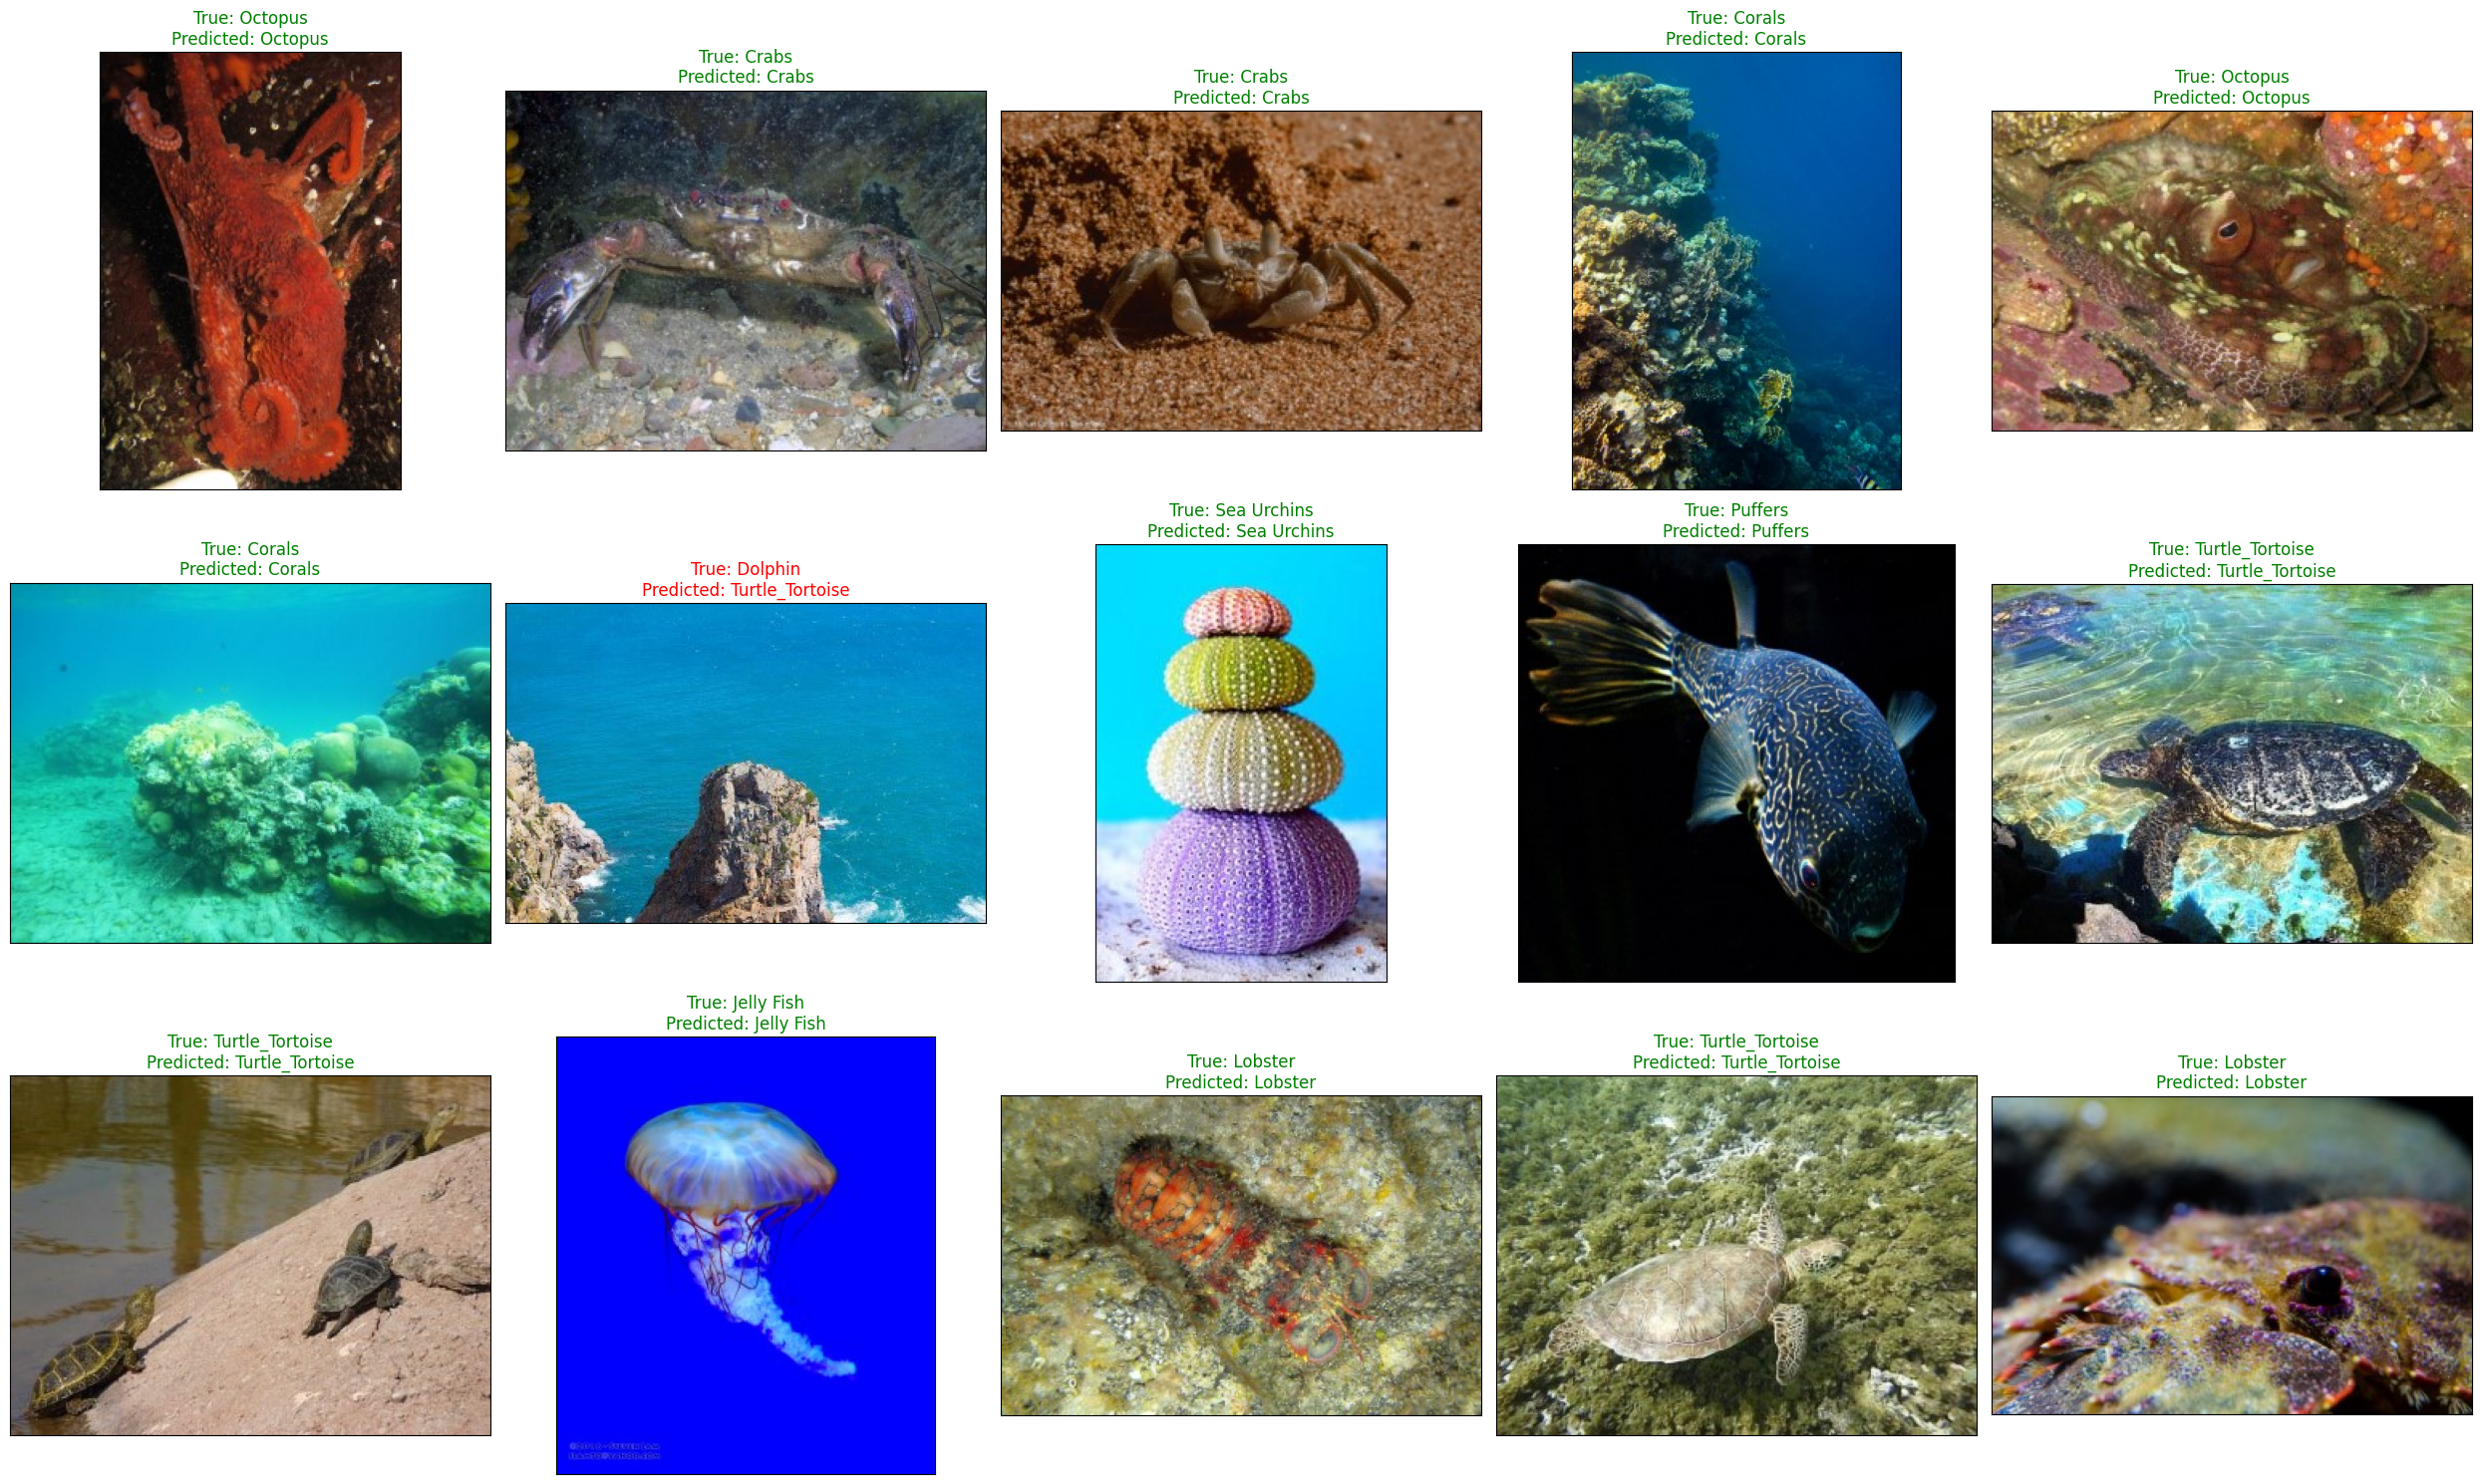

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Get predictions for the entire test set
test_predictions = resnet_model.predict(test_images)
pred_classes = np.argmax(test_predictions, axis=1)

# Get the class labels as a list
class_labels = list(test_images.class_indices.keys())

# Select 15 random images from the test set
random_index = np.random.randint(0, len(test_df), 15)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Get the filepath of the random image
    img_path = test_df.Filepath.iloc[random_index[i]]

    # Open the image using PIL
    img = Image.open(img_path)
    ax.imshow(img)

    # True and predicted labels
    true_label = test_df.Label.iloc[random_index[i]]
    predicted_label = class_labels[pred_classes[random_index[i]]]

    # Set title color based on correctness
    color = "green" if true_label == predicted_label else "red"
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)

# Adjust layout
plt.tight_layout()
plt.show()

This code visualizes predictions made by the resnet_model on a set of test images. First, predictions are obtained, and the predicted class labels are extracted using np.argmax. It then selects 15 random images from the test set, loads them using PIL, and displays them in a 3x5 grid using matplotlib. For each image, the true label and predicted label are shown as the title. The title's color is set to green if the prediction is correct, and red if incorrect. The layout is adjusted for better visualization with plt.tight_layout().







